In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 

from snewpy.neutrino import Flavor, MassHierarchy
from snewpy.models.ccsn import Walk_2018, Walk_2019
from snewpy.flavor_transformation import NoTransformation, AdiabaticMSW, ThreeFlavorDecoherence

mpl.rc('font', size=16)
%matplotlib inline

In [2]:
Walk_2019.get_param_combinations()

({'progenitor_mass': <Quantity 40. solMass>, 'direction': 1},
 {'progenitor_mass': <Quantity 40. solMass>, 'direction': 2},
 {'progenitor_mass': <Quantity 40. solMass>, 'direction': 3},
 {'progenitor_mass': <Quantity 75. solMass>, 'direction': 1},
 {'progenitor_mass': <Quantity 75. solMass>, 'direction': 2})

In [9]:
model = Walk_2019(progenitor_mass=75*u.solMass, direction=2)
model

**Walk_2019 Model**

|Parameter|Value|
|:--------|:----:|
|Progenitor mass | $75$ $\mathrm{M_{\odot}}$|
|EOS | LS220 |

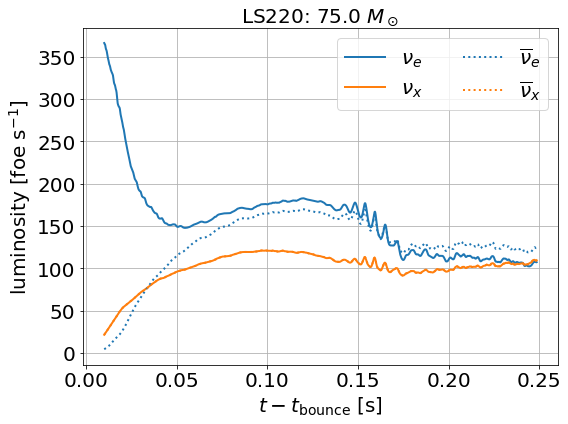

In [10]:


fig, ax = plt.subplots(1, figsize=(8, 6), tight_layout=False)

for flavor in Flavor:
    ax.plot(model.time, model.luminosity[flavor]/1e51,  # Report luminosity in units foe/s
            label=flavor.to_tex(),
            color='C0' if flavor.is_electron else 'C1',
            ls='-' if flavor.is_neutrino else ':',
            lw=2)
ax.set_xlabel(r'$t-t_{\rm bounce}$ [s]', fontsize=20)
ax.set_ylabel(r'luminosity [foe s$^{-1}$]', fontsize=20);
ax.set_title(r'{}: {} $M_\odot$'.format(model.metadata['EOS'], model.metadata['Progenitor mass'].value), fontsize=20)
ax.tick_params(labelsize = 20)
ax.grid()
ax.legend(loc='upper right', ncol=2, fontsize=20)
